In [1]:
from XrayTo3DShape import load_json, MODEL_LABEL_COLOR

In [2]:
model_color_label = MODEL_LABEL_COLOR

In [12]:
hip_indomain_fp = '../../domainshift_results/hip_indomain.json'
hip_indomain = load_json(hip_indomain_fp)

hip_outdomain_kits_fp = '../../domainshift_results/hip_outdomain_kits.json'
hip_outdomain_kits = load_json(hip_outdomain_kits_fp)

hip_outdomain_clinic_fp = '../../domainshift_results/hip_outdomain_clinic.json'
hip_outdomain_clinic = load_json(hip_outdomain_clinic_fp)

hip_outdomain_clinic_metal_fp = '../../domainshift_results/hip_outdomain_clinic_metal.json'
hip_outdomain_clinic_metal = load_json(hip_outdomain_clinic_metal_fp)

vertebra_indomain_fp = '../../domainshift_results/vertebra_indomain.json'
vertebra_indomain = load_json(vertebra_indomain_fp)

vertebra_outdomain_rsna_fp = '../../domainshift_results/vertebra_outdomain_rsna.json'
vertebra_outdomain_rsna = load_json(vertebra_outdomain_rsna_fp)

In [13]:
hip_outdomain_kits, hip_outdomain_clinic, hip_outdomain_clinic_metal, hip_indomain, vertebra_indomain, vertebra_outdomain_rsna

({'SwinUNETR': 0.7768181818181816,
  'AttentionUnet': 0.7863636363636363,
  'TwoDPermuteConcat': 0.7952272727272726,
  'UNet': 0.7793181818181819,
  'MultiScale2DPermuteConcat': 0.7347727272727272,
  'UNETR': 0.7581818181818182,
  'TLPredictor': 0.6100000000000001,
  'OneDConcat': 0.6038636363636365},
 {'SwinUNETR': 0.7603883495145631,
  'AttentionUnet': 0.7522330097087377,
  'TwoDPermuteConcat': 0.7549514563106796,
  'UNet': 0.739611650485437,
  'MultiScale2DPermuteConcat': 0.7382524271844659,
  'UNETR': 0.7240776699029128,
  'TLPredictor': 0.6692233009708739,
  'OneDConcat': 0.6552427184466018},
 {'SwinUNETR': 0.7471428571428572,
  'AttentionUnet': 0.7214285714285714,
  'TwoDPermuteConcat': 0.6992857142857142,
  'UNet': 0.7264285714285714,
  'MultiScale2DPermuteConcat': 0.6878571428571431,
  'UNETR': 0.6978571428571428,
  'TLPredictor': 0.6707142857142857,
  'OneDConcat': 0.6735714285714286},
 {'SwinUNETR': 0.8577611940298507,
  'AttentionUnet': 0.8502985074626864,
  'TwoDPermuteConc

In [23]:
KEYS = [
    'SwinUNETR',
    'AttentionUnet',
    'TwoDPermuteConcat',
    'UNet',
    'MultiScale2DPermuteConcat',
    'UNETR',
    'TLPredictor',
    'OneDConcat',

]

In [24]:
import matplotlib.pyplot as plt
import scienceplots
import tueplots
from tueplots import figsizes, fontsizes
plt.style.use(['science','no-latex'])

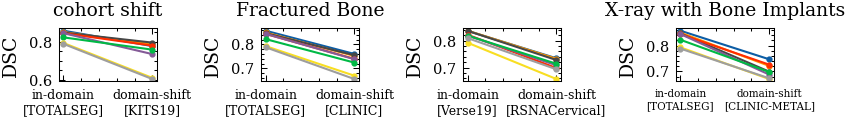

In [25]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
plt.rcParams.update(figsizes.neurips2021(nrows=1, ncols=4))
plt.rcParams.update(fontsizes.neurips2021())


fig, ax = plt.subplots(1,4)
for model in KEYS:
    ax[0].plot(range(1,3),[hip_indomain[model],hip_outdomain_kits[model]],'-o',label=model,markersize=2,c=model_color_label[model],)
ax[0].set_xticks(range(1,3),['in-domain\n[TOTALSEG]','domain-shift\n[KITS19]'], fontsize=6)
ax[0].set_ylabel('DSC')
ax[0].set_title('cohort shift')

for model in KEYS:
    ax[1].plot(range(1,3),[hip_indomain[model],hip_outdomain_clinic[model]],'-o',label=model,markersize=2,c=model_color_label[model],)
ax[1].set_xticks(range(1,3),['in-domain\n[TOTALSEG]','domain-shift\n[CLINIC]'], fontsize=6)
ax[1].set_ylabel('DSC')
ax[1].set_title('Fractured Bone')

for model in KEYS:
    ax[2].plot(range(1,3),[vertebra_indomain[model],vertebra_outdomain_rsna[model]],'-o',label=model,markersize=2,c=model_color_label[model],)
ax[2].set_xticks(range(1,3),['in-domain\n[Verse19]','domain-shift\n[RSNACervical]'], fontsize=6)
ax[2].set_ylabel('DSC')
# ax[2].set_title('X-ray with Bone Implants')

for model in KEYS:
    ax[3].plot(range(1,3),[hip_indomain[model],hip_outdomain_clinic_metal[model]],'-o',label=model,markersize=2,c=model_color_label[model],)
ax[3].set_xticks(range(1,3),['in-domain\n[TOTALSEG]','domain-shift\n[CLINIC-METAL]'], fontsize=5)
ax[3].set_ylabel('DSC')
ax[3].set_title('X-ray with Bone Implants')



# plt.legend(loc=[3,0])
plt.tight_layout()
plt.savefig('../../visualizations/domain_shift_with_legend.pdf')

In [35]:
latex_table = ''
for model in KEYS:
    print(f'{model} & {hip_indomain[model]*100:.2f} & {hip_outdomain_kits[model]*100:.2f} & {hip_indomain[model]*100 - hip_outdomain_kits[model]*100:.2f} & {hip_outdomain_clinic[model]*100:.2f} & {hip_indomain[model]*100 - hip_outdomain_clinic[model]*100:.2f} & {hip_outdomain_clinic_metal[model]*100:.2f} & {hip_indomain[model]*100 - hip_outdomain_clinic_metal[model]*100:.2f} & {vertebra_indomain[model]*100:.2f} & {vertebra_outdomain_rsna[model]*100:.2f} & {vertebra_indomain[model]*100 - vertebra_outdomain_rsna[model]*100:.2f}\\\\')
print(latex_table)

SwinUNETR & 85.78 & 77.68 & 8.09 & 76.04 & 9.74 & 74.71 & 11.06 & 83.59 & 73.42 & 10.18\\
AttentionUnet & 85.03 & 78.64 & 6.39 & 75.22 & 9.81 & 72.14 & 12.89 & 83.66 & 73.23 & 10.43\\
TwoDPermuteConcat & 84.75 & 79.52 & 5.22 & 75.50 & 9.25 & 69.93 & 14.82 & 83.62 & 72.77 & 10.85\\
UNet & 84.45 & 77.93 & 6.52 & 73.96 & 10.49 & 72.64 & 11.80 & 82.17 & 69.80 & 12.37\\
MultiScale2DPermuteConcat & 84.48 & 73.48 & 11.00 & 73.83 & 10.65 & 68.79 & 15.69 & 81.85 & 70.83 & 11.03\\
UNETR & 82.27 & 75.82 & 6.45 & 72.41 & 9.86 & 69.79 & 12.48 & 81.84 & 71.39 & 10.45\\
TLPredictor & 79.33 & 61.00 & 18.33 & 66.92 & 12.41 & 67.07 & 12.26 & 79.20 & 65.74 & 13.46\\
OneDConcat & 78.85 & 60.39 & 18.46 & 65.52 & 13.33 & 67.36 & 11.49 & 80.92 & 69.35 & 11.57\\

